In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization


In [2]:
# Load pretrained model
model = load_model('G_final.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [3]:
# Delete fully-connected layers (last three layers)
for i in range(3):
    model.pop()
    
# Freeze convolution layers to make them untrainable
for layer in model.layers:
    layer.trainable = False

In [4]:
# Add fully connected layers to the model

# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4, name='dropout_3'))

#2nd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4, name='dropout_5'))

#Output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [5]:
train_data_dir = "D:/Projects/Datasets/Reduced_Sign_Dataset/Train"
test_data_dir = "D:/Projects/Datasets/Reduced_Sign_Dataset/Test"
categories = os.listdir(train_data_dir)
print(len(categories))

10


In [6]:
X_train = []
y_train = []
train_data = []
# for loop to save all images data and labels after resize it 
for category in categories:
    label = categories.index(category)
    path = os.path.join(train_data_dir,category)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            train_data.append([image, label])
        except Exception as e:
            print(e)

In [7]:
# Shuffle data to get better training
import random
random.shuffle(train_data)
for image,label in train_data:
    X_train.append(image)
    y_train.append(label)

In [8]:
X_train =  np.array(X_train)
y_train = np.array(y_train)

In [9]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Fit model on training data
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.3)

Epoch 1/20
48/48 [==============================] - 4s 60ms/step - loss: 1.0738 - accuracy: 0.8358 - val_loss: 0.5183 - val_accuracy: 0.9421
Epoch 2/20
48/48 [==============================] - 3s 55ms/step - loss: 0.8161 - accuracy: 0.9274 - val_loss: 0.4888 - val_accuracy: 0.9863
Epoch 3/20
48/48 [==============================] - 2s 49ms/step - loss: 0.7271 - accuracy: 0.9444 - val_loss: 0.4491 - val_accuracy: 0.9909
Epoch 4/20
48/48 [==============================] - 2s 47ms/step - loss: 0.6524 - accuracy: 0.9509 - val_loss: 0.3633 - val_accuracy: 0.9939
Epoch 5/20
48/48 [==============================] - 2s 47ms/step - loss: 0.5904 - accuracy: 0.9588 - val_loss: 0.3529 - val_accuracy: 0.9939
Epoch 6/20
48/48 [==============================] - 2s 48ms/step - loss: 0.5457 - accuracy: 0.9581 - val_loss: 0.3345 - val_accuracy: 0.9924
Epoch 7/20
48/48 [==============================] - 2s 47ms/step - loss: 0.4985 - accuracy: 0.9712 - val_loss: 0.2884 - val_accuracy: 0.9924
Epoch 8/20
48

In [11]:
# Save the model in HDF5 file
model.save("sign_model.h5")

# Save model archeticture in json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

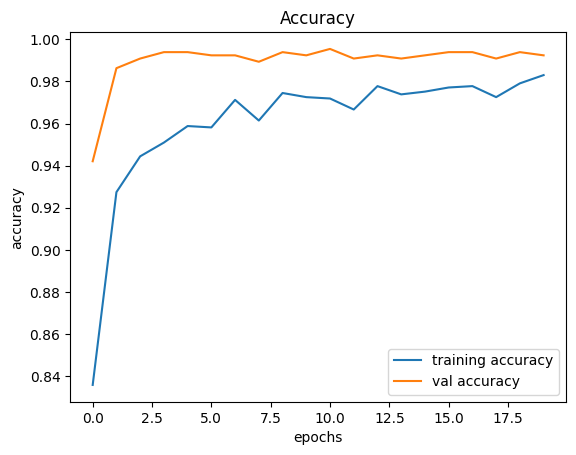

In [12]:
# Plot the accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

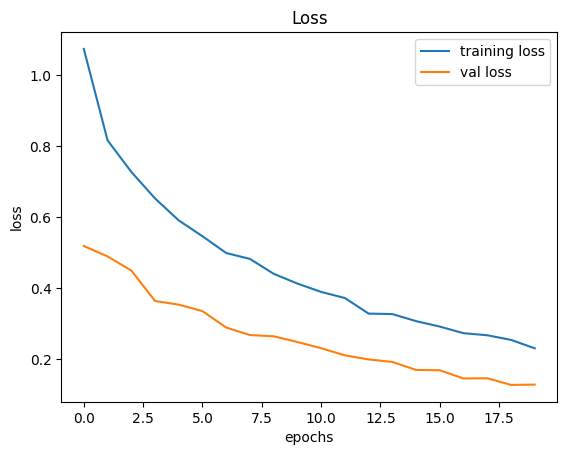

In [13]:
# Plot the Loss

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
classes = {
    0: 'Turn Right',
    1: 'Turn Left',
    2: 'Bump',
    3: 'Stop',
    4: 'Speed Limit 20',
    5: 'Speed Limit 30',
    6: 'Speed Limit 50',
    7: 'Speed Limit 60',
    8: 'Speed Limit 70',
    9: 'Speed Limit 80',
}